In [ ]:
from BNumMet import Random

In [ ]:
arr = [1]

In [ ]:
if len(arr) >= 3:
    print((6 * arr[-1] - 9 * arr[-2]) % 1)  # Test
aux = Random.lehmers_rand(a=2**16 + 3, m=2**31, c=0, x=arr[-1])
arr.append(aux)
print(arr)

In [ ]:
testArr = [0, 1]

In [ ]:
aux = Random.marsaglia_rand(
    base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)
)  # testArr = [0, 1, 9, 1, 7, 4, 2, 2, 0, 2, 8, 3, 4, 9]
testArr.append(aux)
print(testArr)

In [ ]:
Random.genrand()

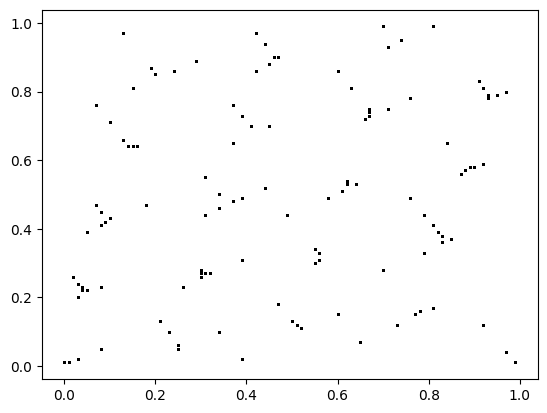

In [5]:
# Test Random.genrand()
import matplotlib.pyplot as plt
from BNumMet import Random

xy_fail1 = [
    (
        Random.marsaglia_rand(base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
        Random.marsaglia_rand(base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
    )
    for i in range(100000)
]


fail2 = (
    lambda: float(
        (int(Random.lehmers_rand(a=65539, c=0, m=2**31, x=123) * (2**31)) >> 23)
        & 0xFF
    )
    / 255
)
xy_fail2 = [(fail2(), fail2()) for i in range(100000)]


plt.scatter(*zip(*xy_fail1), s=1, c="black")

In [ ]:
import numpy
from nistrng import *

# Test genrand from nistrng
sequence = numpy.array(
    [Random.genrand() * 0xFFFFFFFF for i in range(100)], dtype=numpy.uint64
)


binary_sequence: numpy.ndarray = pack_sequence(sequence)

# Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
eligible_battery: dict = check_eligibility_all_battery(
    binary_sequence, SP800_22R1A_BATTERY
)
for i in eligible_battery:
    print(i)

# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
results = [result.passed for result, _ in results]
print(results)

In [ ]:
lambda: Random.marsaglia_rand() / 4

In [ ]:
from BNumMet import Random

from BNumMet.Visualizers import RandomVisualizer
from random import random

randomVis = RandomVisualizer.RandomVisualizer(
    lambda: Random.lehmers_rand(a=2**16 + 3, m=2**31, c=0, x=arr[-1])
)
randomVis.run()